## Intro to Machine Learning, Week 1: Regression, Regularization 

This first programming session covers linear regression, batch and stochastic gradient descent as well as regularization. You will asked to implement those methods from numpy but we will also use the built in functions from scikit learn. 

### Exercise 1. Generating data

Using numpy together with the random submodule. Generate equispaced points on the line between 0 and 5. Choose a particular linear function of the form $t_i = \beta_0 + \beta_1 x_i$ for some $\beta_0$ and $\beta_1$ to generate the targets. Then perturb those targets with some random noise of the form $\varepsilon_i \sim \mathcal{N}(0,\sigma^2)$ for some appropriate $\sigma^2$ (try a few values). 

Plot the result using the submodule pyplot from the module matplotlib.  

In [ ]:
# see below

### Exercise 2. Learning the weights 

##### 2.1. Batch gradient descent. 
Now that we have the data, we will see if we can recover the weights. We will start by implementing a simple batch gradient descent approach. Using the pairs $\left\{x_i, t_i\right\}_{i=1}^N$, implement the gradient descent step that we learned in class. Try different learning rates and plot the evolution of the error on the training set. Display the resulting model on top of the data.  

In this case since we know how the data was generated, you can also plot the evolution of the test error throught he iterations. One way to measure the prediction error in this case is to take the difference between your model and the noiseless data $\beta_0 + \beta_1x$. In general, however, we do not have access to the true function that was used to generate the data. All we have is a set of pairs $\left\{\mathbf{x}_i, t_i\right\}_{i=1}^N$. In this case, we will typically split this set into a training and a test part. Use the training part to learn the model and evaluate the model based on the test part as $\sum_{i\in \text{test}}\left(h_{\beta_{\text{training}}}(\mathbf{x}_i) -t_i\right)^2$. Implement this approach as well.  

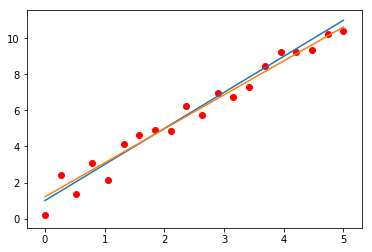

In [149]:

# generate features between 0 and 5
x = np.linspace(0, 5, num=20)

# beta used to generate the noiseless targets
true_beta = [1,2]
targets = true_beta[0] + true_beta[1]*x

# adding noise to the targets 
noisy_targets = targets + np.random.normal(0, 0.4, len(x))


# optimization params
maxIter =40
currentiter =0
eta = .1

# initial vector of weights. Note the np.squeeze !! my bug was coming from the fact that (2,1) generate a 2D array of 
# size (2,1). and not a 1D array of size (2,). For some reason this generated a bug somewhere below.

beta = np.squeeze(np.random.uniform(0,3, (2,1)))

predictions = np.dot(Xtilde,beta) 

error  = (noisy_targets - predictions)


while currentiter< maxIter :    
    
    
    # computing the derivatives with respect to beta0 first 
    
    # the loss is given by sum_i (t_i - (beta0 + beta1*x_i))^2 Hence the derivative with respect to beta0 is 
    # sum_i -2(t_i - (beta0 + beta1*x_i))*1 and the derivative with respect to beta1 is 
    # sum_i -2(t_i - (beta0 + beta1*x_i))*x_i
    
    tmp_beta0 = -np.true_divide(2,len(x))*error # vector of dimension N
    gradient_beta0 = np.sum(tmp_beta0)

    tmp_beta1 = -np.true_divide(2,len(x))*error  # vector of dimension N
    tmp_beta1 = np.multiply(tmp_beta1, x)  # sum_i (t_i- (beta0 + beta1*x_i))*x_i
    gradient_beta1 = np.sum(tmp_beta1)
    
    # flipping the sign to move along the descent direction and multiplying by the learning rate (i.e. step size)
    beta[0] = beta[0] - eta*gradient_beta0
    beta[1] = beta[1] - eta*gradient_beta1
    
    # recomputing the error and value of the loss for the new beta 
    predictions = np.dot(Xtilde,beta)
    error  = (noisy_targets - predictions)
    current_loss = np.true_divide(1,len(x))*np.sum((error**2))
        
    currentiter+=1
    
    
# displaying the prediction on a new set of points between 0 and 5    
x2 = np.linspace(0,5, 100)
X2tilde = np.hstack((np.ones((len(x2),1)), x2.reshape(-1,1)))

predictions = np.dot(X2tilde, beta.reshape(-1,1))



# blue line is original model that was used to generate the data 
# orange line is model that was recovered through gradient descent 
# red dots are the noisy samples

plt.plot(x, targets)
plt.scatter(x, noisy_targets, color='r')
plt.plot(x2, predictions)
plt.show()


#### 2.2. Stochastic gradient and minibatch

In class we have seen that an alternative to gradient descent is to apply iterations that rely on only one sample at each iteration. Such iterations thus take the form 

$$\mathbf{\beta}' \leftarrow \mathbf{\beta} +\eta \cdot \mathbf{x}_i\left(\langle \mathbf{\beta}, \mathbf{x}_i\rangle - t_i \right)$$

where $\eta $ represents the learning rate and are repeated for each $\left\{\mathbf{x}_i, t_i\right\}$ from the dataset. The procedure is repeated several time until an appropriate criterion (e.g. sufficiently small training error) is achieved. One pass over the whole training set is called epoch and the optimization thus relies on a repetition of such epochs. Implement this idea below and plot the evolution of the training and test error. Compare with the Batch gradient descent approach that you implemented above


In [ ]:
# to be done 

An intermediate approach between Stochastic gradient descent and Batch gradient descent consists in considering minibatches of pairs $\left\{\mathbf{x}_i, t_i\right\}_{i\in S}$. I.e. we divide the dataset (which often is too big to be considered as a whole) and apply the iterations on each batch separately. One epoch thus corresponding to a pass through the whole set of minibatches. Implement that last aproach, look at the evolution of the error with the iterations and compare with the previous approaches.

### Exercise 3. From univariate to multivariate

We now want to extend your algorithm to the multidimensional framework. Consider a model of the form $\beta_0 + \beta_1 x_1 + \beta_2 x_2$ and generate noisy targets as above. Then apply both the batch gradient descent and stochastic gradient descent iteration to recover your weights. This time, since we are in 2D space, we can plot the actual iterations. Using the contour function from matplotlib, plot and iteration on top of the level lines of the loss. Compare the trajectory of batch gradient descent with stochastic gradient descent. 

### Exercise 4. Polynomial features

So far we have worked with data that had been linearly generated. The Multivariate regression model is in fact much more powerful and can be used with any type of features, including polynomial features through which we can thus learn data that generated non linearly. Generate data following a model of the form $\beta_0 + \beta_1x+\beta_2 x^2$ where you see $x^2$ as an additional feature, i.e. $x_1 = x$ and $x_2 = x^2$. Learn the model and plot the result in the space $(t, x)$ and $(t, x, x^2)$. In this last case, what do you notice?

### Exercise 5. Scikit-learn

Repeat the exercises above with the linear regression and polynomial features from scikit learn. 

### Exercise 6. Regression for prediction

Using the lines below load the evolution of the Google stock prices during the year 2004-2005. Relying on this data, try to learn a predictive model for the year 2005 - 2006. 

[*********************100%***********************]  1 of 1 downloaded


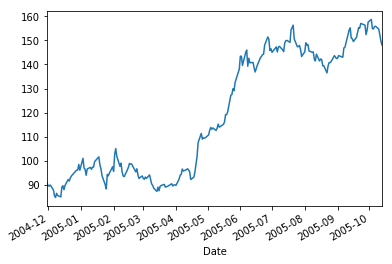

In [1]:
import yfinance as yf
# Get the data of the stock AAPL
data = yf.download('GOOG','2004-12-01','2005-10-14')
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()